In [1]:
from pycalphad import equilibrium, calculate
from pycalphad import Database, Model
from pycalphad.core.lower_convex_hull import lower_convex_hull
import pycalphad.variables as v

In [2]:
db_alfe = Database('alfe_sei.TDB')
my_phases_alfe = ['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL5FE4', 'FCC_A1', 'B2_BCC', 'AL13FE4']

In [3]:
%time eq = equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.X('AL'): (0.01+1e-4, 0.99, 0.02), v.T: 1300, v.P: [101325]}, verbose=False)
print(eq)

[[ 0.          0.00019617]
 [ 0.00019617  0.        ]]
Chem pot progress 100.323905904
Energy progress -0.000193281026441
Chem pot progress 25.1467429888
Energy progress 0.0
Chem pot progress 2.91038304567e-11
Energy progress 0.0
No progress
[[ 0.          0.00189448]
 [ 0.00189448  0.        ]]
Chem pot progress 202.554250482
Energy progress -0.0952724585077
Chem pot progress 207.265793969
Energy progress -7.69752659835e-07
Chem pot progress 2.76275386568e-05
Energy progress -8.0035533756e-10
No progress
[[ 0.          0.00089869]
 [ 0.00089869  0.        ]]
Chem pot progress 88.3691810809
Energy progress -0.0349910978257
Chem pot progress 29.2929353238
Energy progress 0.0
Chem pot progress 2.91038304567e-11
Energy progress -1.45519152284e-11
No progress
[[ 0.          0.00094541]
 [ 0.00094541  0.        ]]
Chem pot progress 75.4582550821
Energy progress -0.0255052922294
Chem pot progress 69.5081933641
Energy progress -7.50165781938e-07
Chem pot progress 1.32960558403e-05
Energy prog

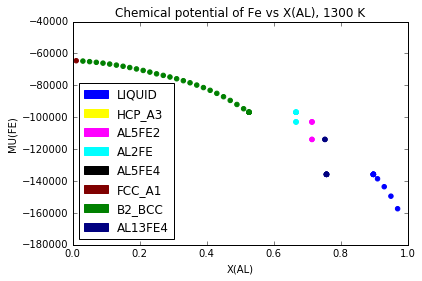

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.plot.utils import phase_legend
plt.gca().set_xlim((0,1))
plt.gca().set_title('Chemical potential of Fe vs X(AL), 1300 K')
plt.gca().set_xlabel('X(AL)')
plt.gca().set_ylabel('MU(FE)')
phase_handles, phasemap = phase_legend(my_phases_alfe)
phasecolors = [phasemap[str(p)] for p in eq.Phase.sel(T=1300, vertex=0).values[0] if p != '']
plt.scatter(eq.X.sel(T=1300, component='AL', vertex=0), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
phasecolors = [phasemap[str(p)] for p in eq.Phase.sel(T=1300, vertex=1).values[0] if p != '']
plt.scatter(eq.X.sel(T=1300, component='AL', vertex=1), eq.MU.sel(T=1300, component='FE'), color=phasecolors)
plt.gca().legend(phase_handles, my_phases_alfe, loc='lower left')